In [24]:
from IPython.display import HTML
import fastdup
import os
fastdup.__version__

'0.189'

In [25]:
fastdup.run(input_dir='scene_classification_clean/data/', work_dir="scene_classification_clean/report/")

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
Found existing atrain_features.dat file in the working directory, please remove it before running the program or run in a fresh directory.
If you like to resume a previously stopped run, please run with resume=1.


1

{'hierarchical_run': False, 'hierarchical_threshold': 'similarity'}


100%|██████████| 50/50 [00:00<00:00, 348.54it/s]


Stored similarity visual view in  scene_classification_clean/report/similarity.html



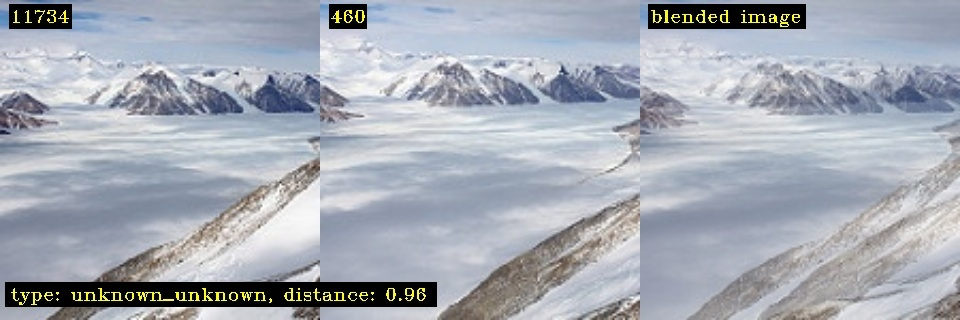
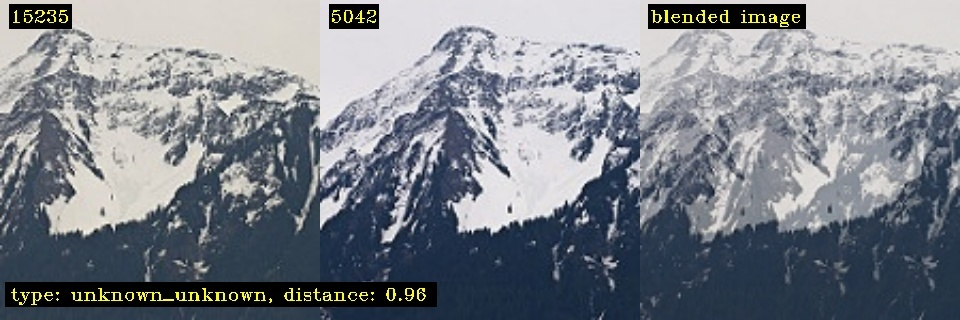
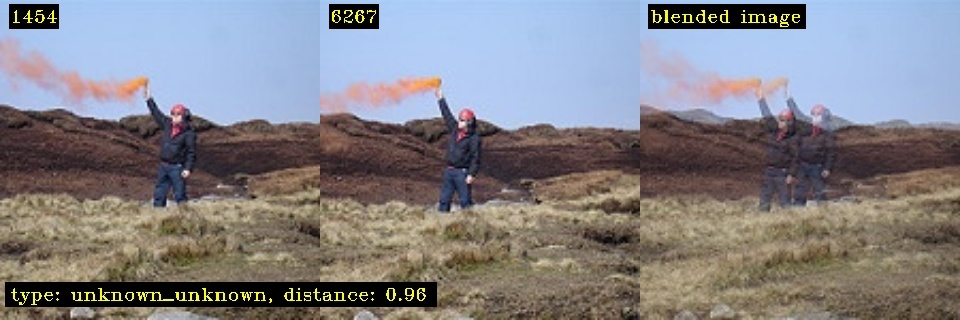
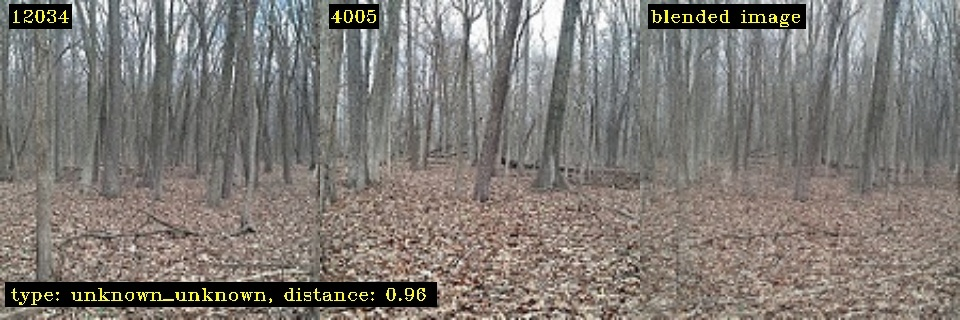
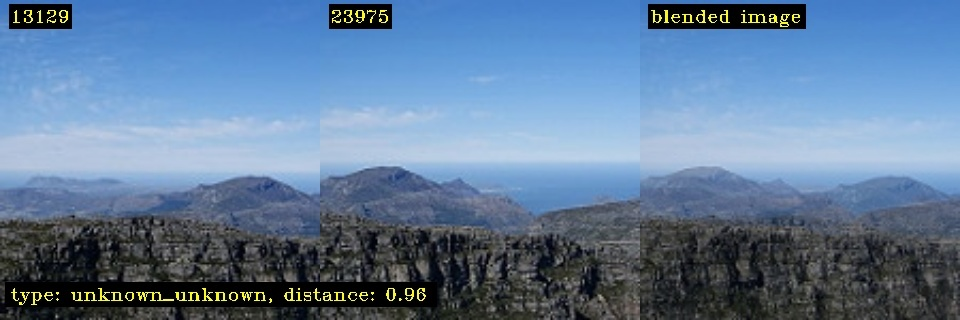
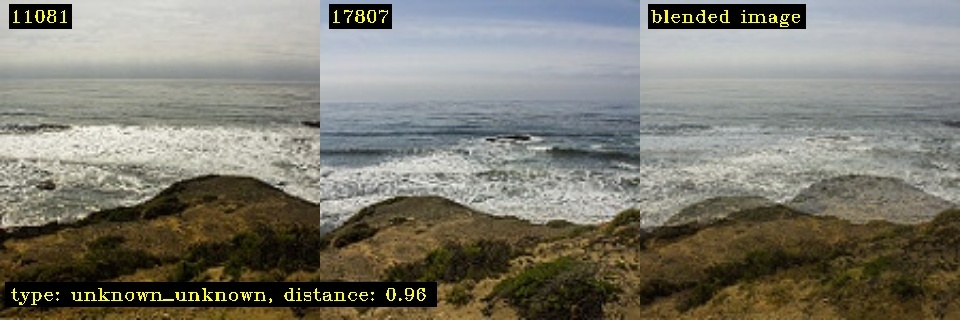
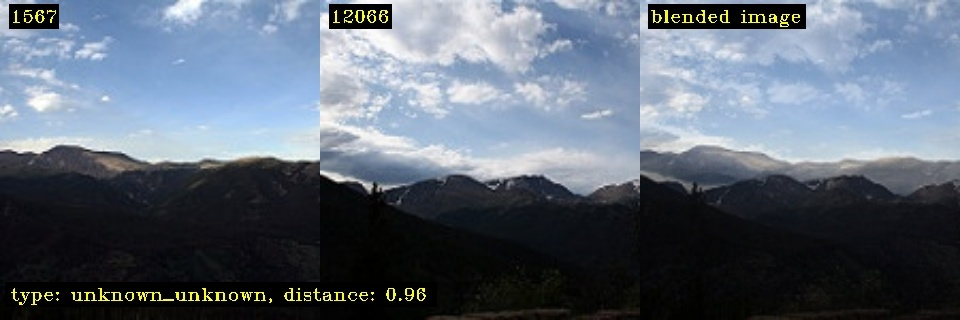
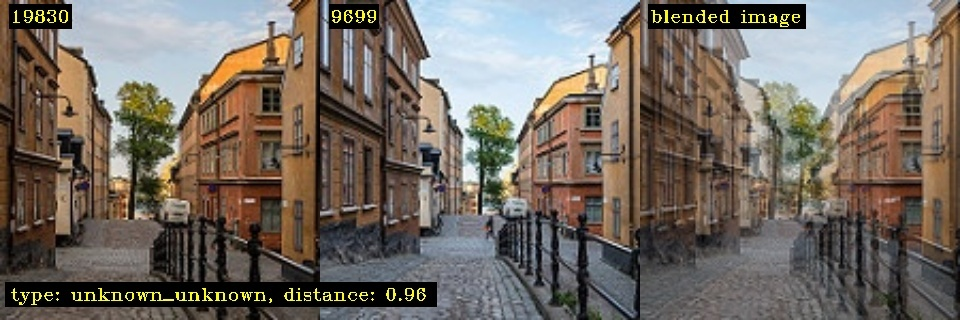
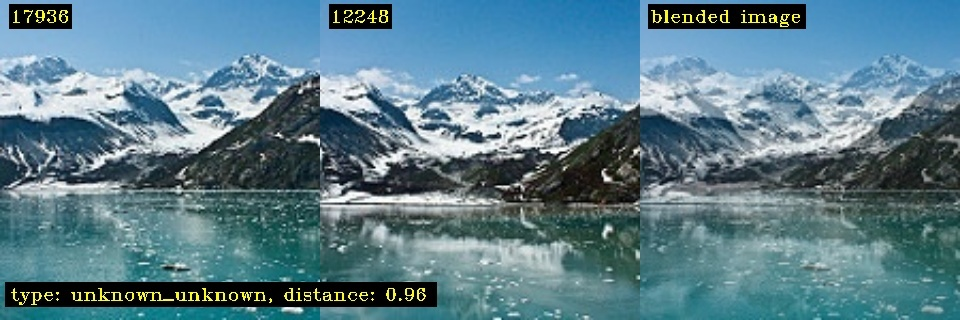
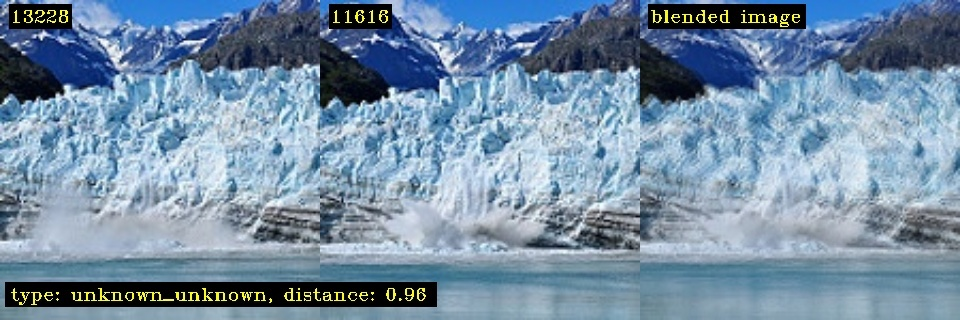
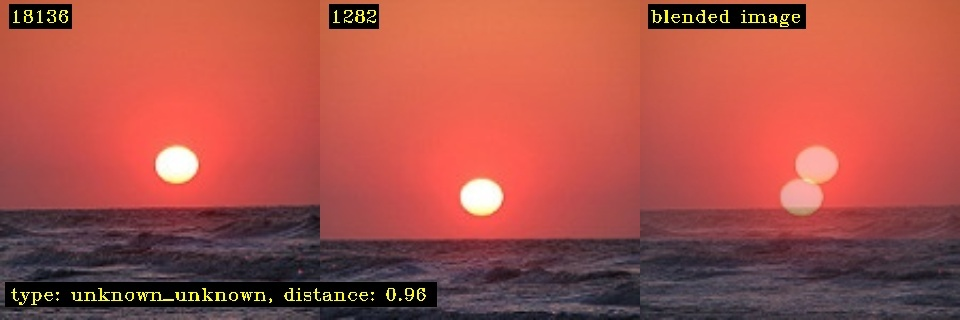
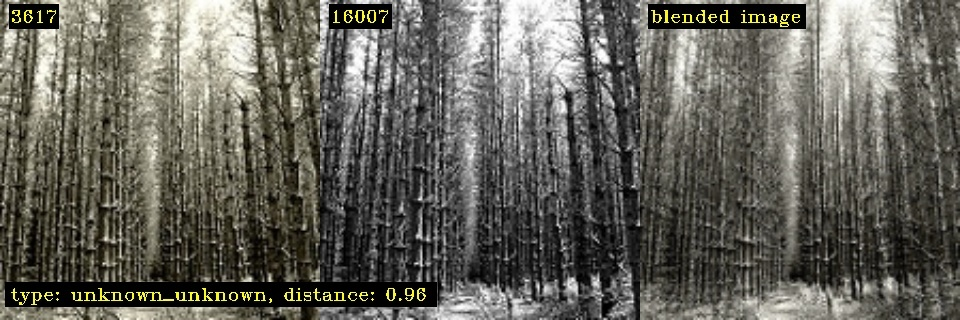
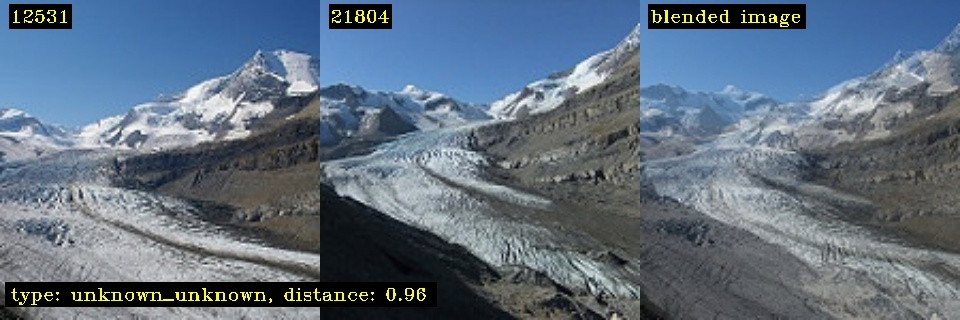
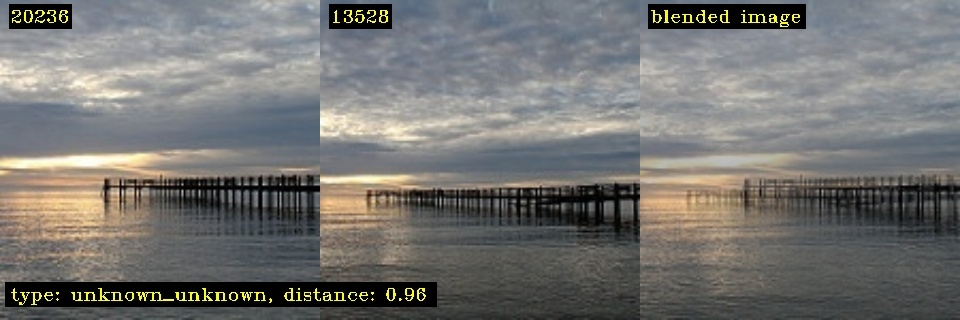
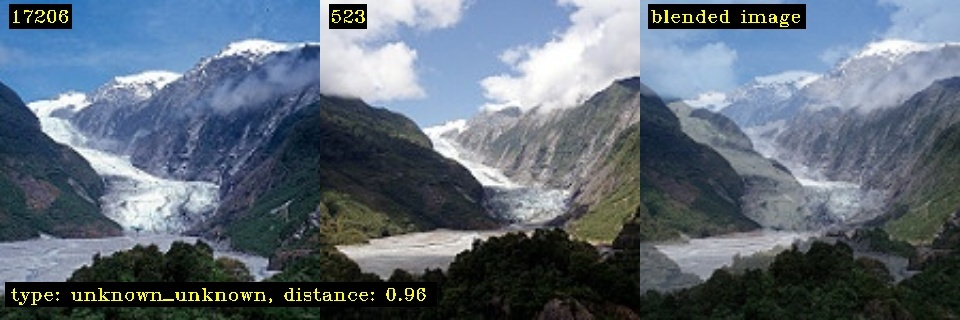
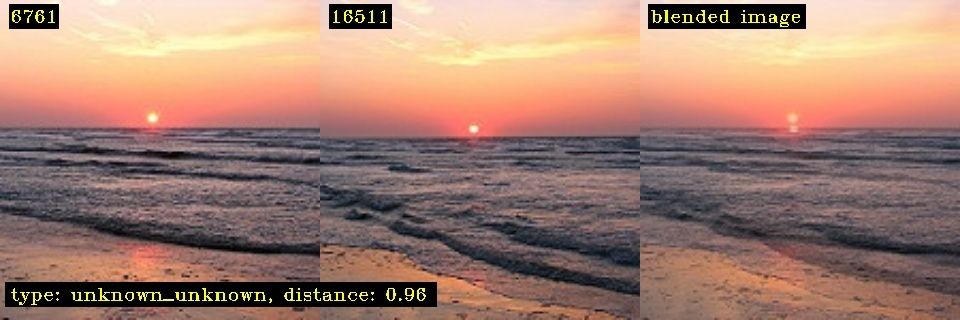
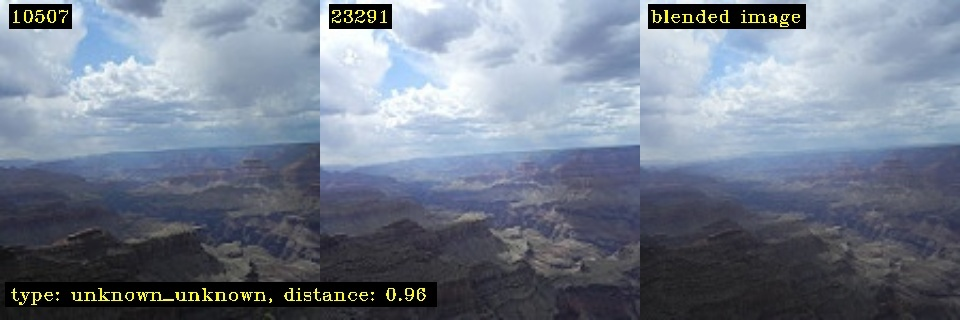
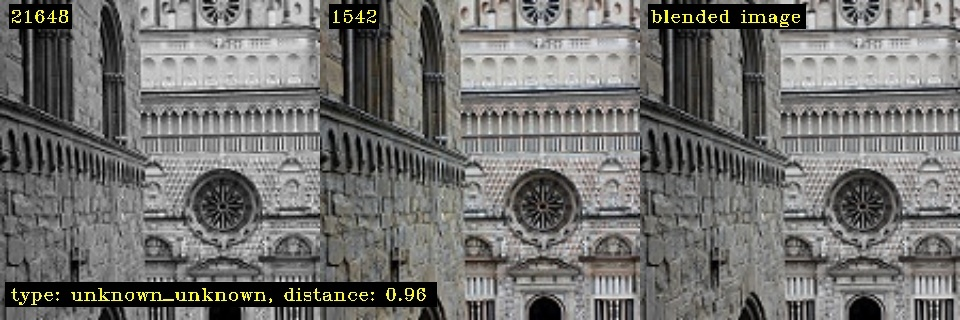
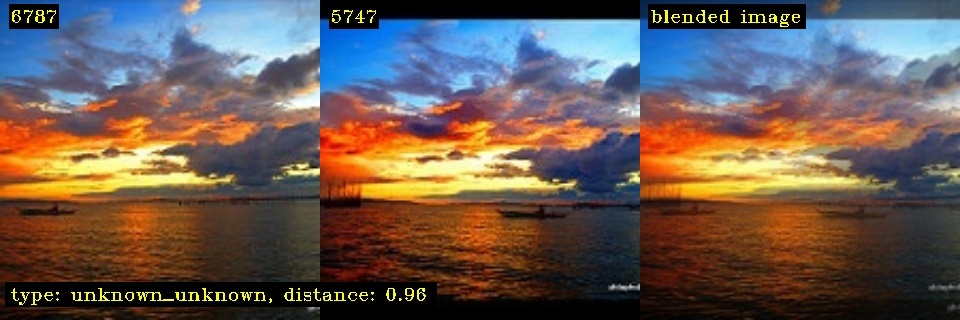
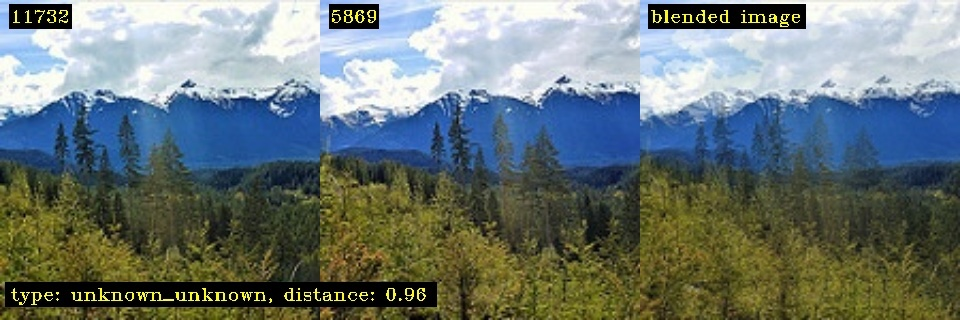
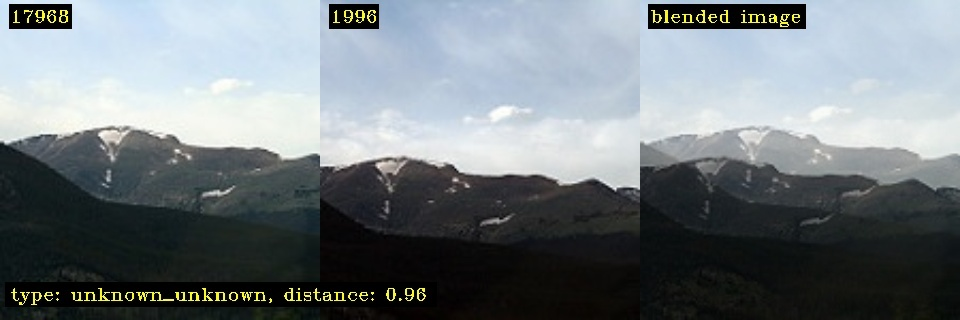
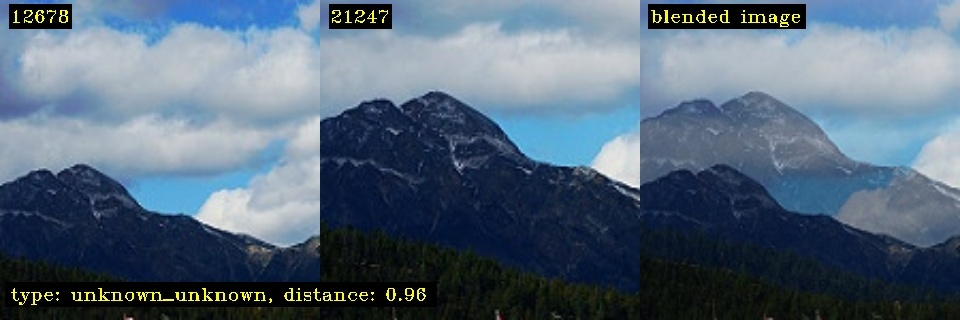
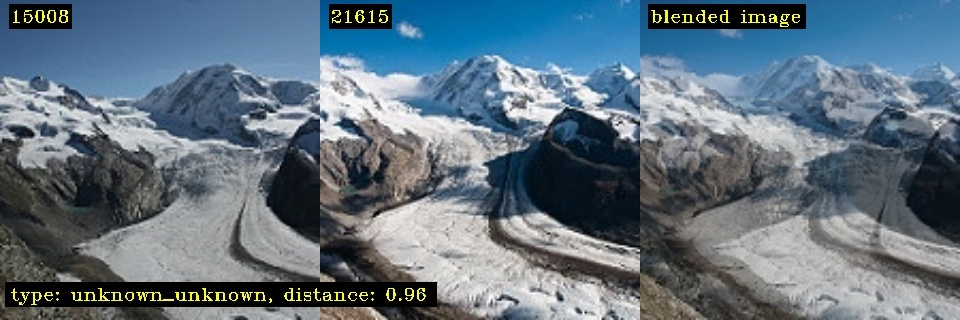
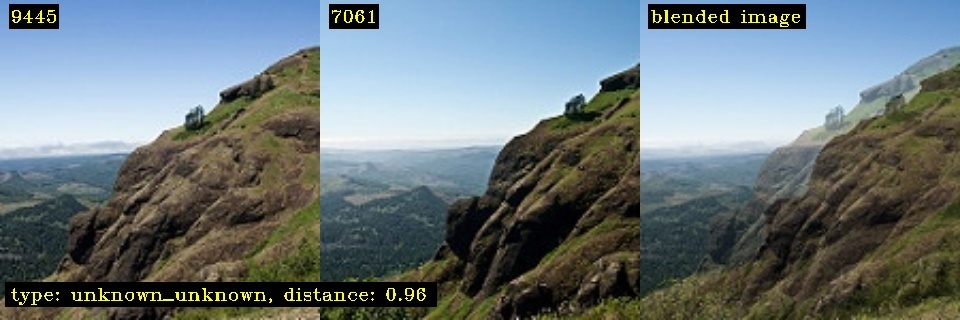
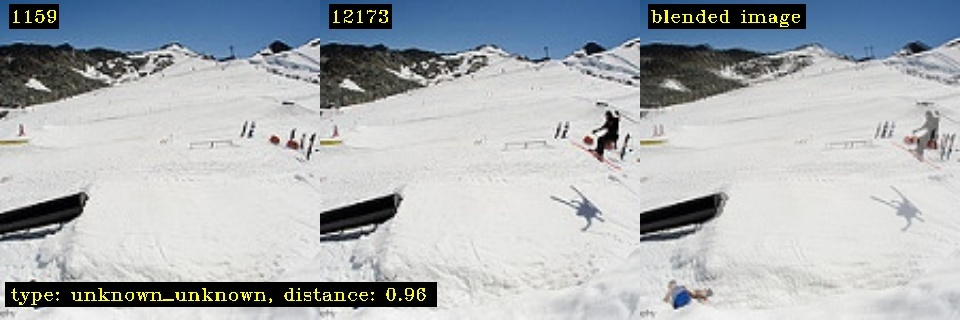

In [26]:
fastdup.create_duplicates_gallery(similarity_file='scene_classification_clean/report/similarity.csv', save_path='scene_classification_clean/report/', num_images=50)
HTML('scene_classification_clean/report/similarity.html')

In [27]:
top_components = fastdup.find_top_components(work_dir="scene_classification_clean/report/")
fastdup.delete_components(top_components, None, how='one', dry_run=False)

Traceback (most recent call last):
  File "/home/dnth/anaconda3/envs/fastdup/lib/python3.9/site-packages/fastdup/__init__.py", line 1772, in find_top_components
    ret = do_find_top_components(work_dir, get_label_func, group_by, slice, threshold=threshold,
  File "/home/dnth/anaconda3/envs/fastdup/lib/python3.9/site-packages/fastdup/galleries.py", line 1063, in do_find_top_components
    assert len(comps), "No components found with more than one image/video"
AssertionError: No components found with more than one image/video
Traceback (most recent call last):
  File "/home/dnth/anaconda3/envs/fastdup/lib/python3.9/site-packages/fastdup/__init__.py", line 1378, in delete_components
    assert isinstance(top_components, pd.DataFrame), "top_components should be a pandas dataframe"
AssertionError: top_components should be a pandas dataframe


100%|██████████| 5/5 [00:00<00:00, 12771.94it/s]

Stored outliers visual view in  scene_classification_clean/report/outliers.html



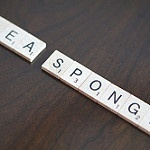
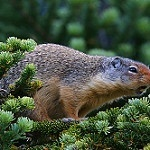
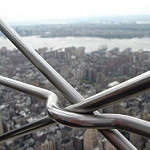
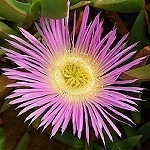
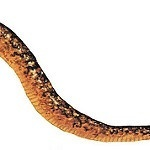

In [30]:
fastdup.create_outliers_gallery(outliers_file='scene_classification_clean/report/outliers.csv', save_path='scene_classification_clean/report', num_images=5)
HTML('scene_classification_clean/report/outliers.html')

In [31]:
fastdup.delete_or_retag_stats_outliers(stats_file="scene_classification_clean/report/", metric="mean", lower_percentile=0.05, dry_run=False)

Going to delete any images with mean < 78.46882755
total deleted 735 files


0

100%|██████████| 20/20 [00:00<00:00, 255.77it/s]


Failed to load imagescene_classification_clean/data/forest/7793.jpg
Stored similar images view in  scene_classification_clean/report/topk_similarity.html



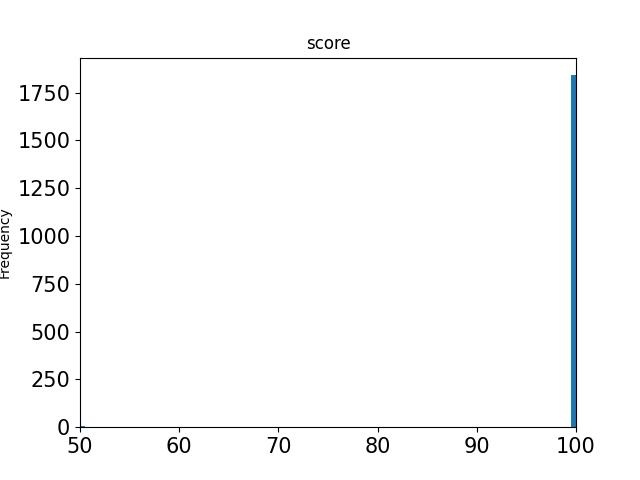
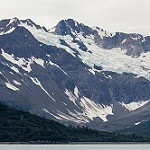
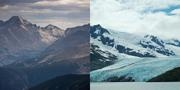
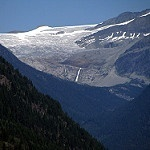
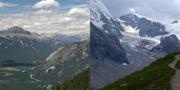
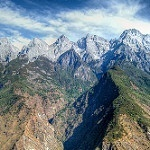
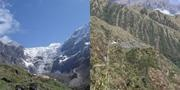
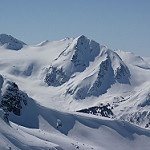
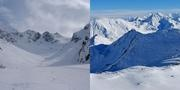
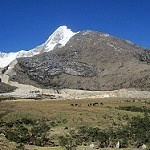
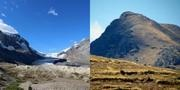
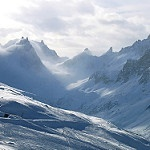
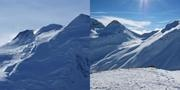
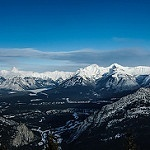
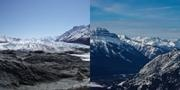
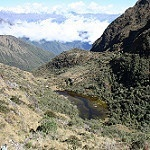
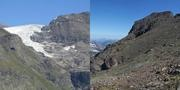
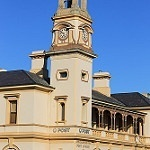
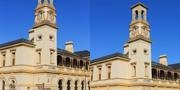
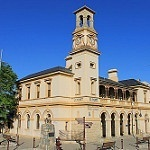
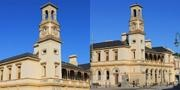
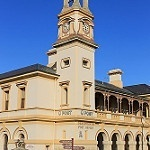
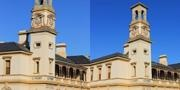
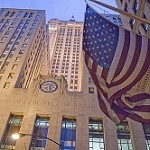
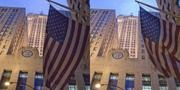
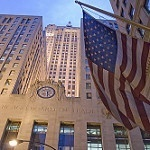
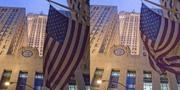
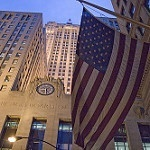
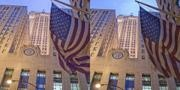
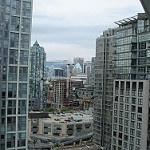
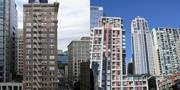
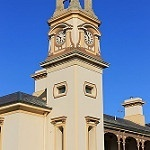
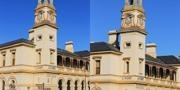
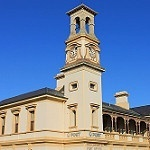
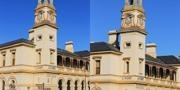
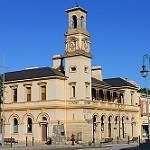
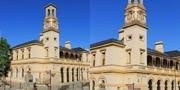
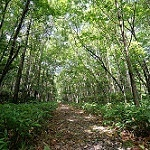
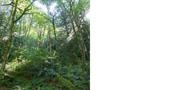
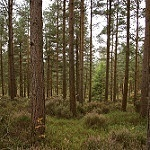
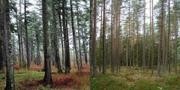

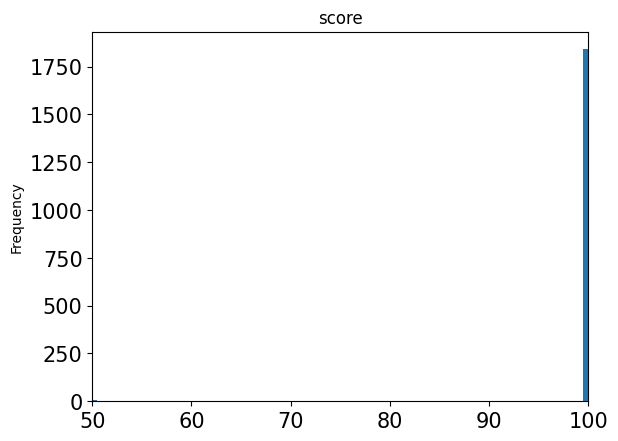

In [32]:
df = fastdup.create_similarity_gallery(similarity_file="scene_classification_clean/report/similarity.csv", save_path="scene_classification_clean/report/", 
                                  get_label_func=lambda x: x.split('/')[-2], get_reformat_filename_func=lambda x: os.path.basename(x),
                                  num_images=20, max_width=180, slice='label_score', descending=False)
HTML('./scene_classification_clean/report/topk_similarity.html')

In [33]:
fastdup.delete_or_retag_stats_outliers(stats_file=df, metric='score', filename_col = 'from', lower_threshold=51, dry_run=False)

Going to delete any images with score < 51
total deleted 8 files


0